In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
from sklearn import preprocessing
from sklearn import metrics

In [ ]:
#Read data
data = pd.read_excel("Enter datafile_path here")
data = pd.DataFrame(data)

#EDA (Exploratory Data Analysis)

In [ ]:
data.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,Unnamed: 19,status
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,NaN,1
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,NaN,NaN,1
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,NaN,1
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,NaN,1
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,NaN,NaN,1


In [ ]:
data = data.drop(['Rank','Name','basename','VGChartz_Score','Global_Sales','Other_Sales','Unnamed: 19','Last_Update','status'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Genre          55792 non-null  object 
 1   ESRB_Rating    23623 non-null  object 
 2   Platform       55792 non-null  object 
 3   Publisher      55792 non-null  object 
 4   Developer      55775 non-null  object 
 5   Critic_Score   6536 non-null   float64
 6   User_Score     335 non-null    float64
 7   Total_Shipped  1827 non-null   float64
 8   NA_Sales       12964 non-null  float64
 9   PAL_Sales      13189 non-null  float64
 10  JP_Sales       7043 non-null   float64
 11  Year           54813 non-null  float64
dtypes: float64(7), object(5)
memory usage: 5.1+ MB


In [ ]:
# stats at a glance grouped by caterorical variables
@interact
def check(column1 = list(data.select_dtypes('object').columns),column2 = list(data.select_dtypes('float64').columns)):
    return data[[column1,column2]].groupby(column1).agg(['max','min','mean',
                                                           'median','std',
                                                           'sum','count'])

interactive(children=(Dropdown(description='column1', options=('Genre', 'ESRB_Rating', 'Platform', 'Publisher'…

In [ ]:
data.head()

,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Year
0,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,2006.0
1,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,1985.0
2,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,2008.0
3,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,2017.0
4,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,2009.0


In [ ]:
#finding null values
print("NULL VALUES IN")
print("PAL :",data['PAL_Sales'].isna().sum())
print("NA :",data['NA_Sales'].isna().sum())
print("JAPAN :",data['JP_Sales'].isna().sum())

NULL VALUES IN
PAL : 42603
NA : 42828
JAPAN : 48749


In [ ]:
data.shape

(55792, 12)

In [ ]:
#removing the null values
data = data[data['PAL_Sales'].notna()]
data = data[data['NA_Sales'].notna()]
data = data[data['JP_Sales'].notna()]
#data = data.reset_index(drop=True, inplace=True)

In [ ]:
data.head()

,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Year
19,Action,M,PS3,Rockstar Games,Rockstar North,9.4,NaN,NaN,6.37,9.85,0.99,2013.0
20,Action,M,PS4,Rockstar Games,Rockstar North,9.7,NaN,NaN,6.06,9.71,0.60,2014.0
30,Action,M,PS2,Rockstar Games,Rockstar North,9.6,NaN,NaN,8.41,5.49,0.47,2002.0
32,Action,M,X360,Rockstar Games,Rockstar North,NaN,NaN,NaN,9.06,5.33,0.06,2013.0
34,Shooter,M,PS4,Activision,Treyarch,NaN,NaN,NaN,6.18,6.05,0.41,2015.0


In [ ]:
#finding null values
print("NULL VALUES IN")
print("Critic_Score :",data['Critic_Score'].isna().sum())
print("User_Score :",data['User_Score'].isna().sum())
print("Total_Shipped",data['Total_Shipped'].isna().sum())


NULL VALUES IN
Critic_Score : 1121
User_Score : 2332
Total_Shipped 2438


In [ ]:
#data = data.reset_index(inplace=True)
#data = data.drop(['index'],axis=1)
data.head()
#data = pd.DataFrame(data)

,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Year
19,Action,M,PS3,Rockstar Games,Rockstar North,9.4,NaN,NaN,6.37,9.85,0.99,2013.0
20,Action,M,PS4,Rockstar Games,Rockstar North,9.7,NaN,NaN,6.06,9.71,0.60,2014.0
30,Action,M,PS2,Rockstar Games,Rockstar North,9.6,NaN,NaN,8.41,5.49,0.47,2002.0
32,Action,M,X360,Rockstar Games,Rockstar North,NaN,NaN,NaN,9.06,5.33,0.06,2013.0
34,Shooter,M,PS4,Activision,Treyarch,NaN,NaN,NaN,6.18,6.05,0.41,2015.0


In [ ]:
#here as all the total_shipped values are null we will dop it
data = data.drop(['Total_Shipped'],axis=1)
data = data.drop(['User_Score'],axis=1)
data = data[data['Critic_Score'].notna()]
#data = data.reset_index(inplace=True)
#data = data.drop(['index'],axis=1)
data.shape


(1317, 10)

In [ ]:
print(data['ESRB_Rating'].value_counts())
print(data['Genre'].value_counts())
print(data['Platform'].value_counts())
print(data['Publisher'].value_counts())
print(data['Developer'].value_counts())
print(data['Year'].value_counts())

T      476
M      359
E      328
E10    145
Name: ESRB_Rating, dtype: int64
Role-Playing        229
Action              219
Shooter             203
Sports              120
Racing               97
Fighting             95
Platform             85
Adventure            65
Simulation           49
Misc                 43
Strategy             35
Puzzle               35
Action-Adventure     33
Music                 3
Party                 3
Sandbox               1
MMO                   1
Board Game            1
Name: Genre, dtype: int64
PS3     267
X360    266
PS2     117
PSP     102
Wii      90
DS       89
3DS      84
PS       78
PS4      57
NS       45
GC       29
WiiU     26
GBA      24
N64      15
XOne     11
XB        7
DC        2
GBC       2
PSN       1
PC        1
PSV       1
NES       1
GB        1
SAT       1
Name: Platform, dtype: int64
Nintendo                       112
Electronic Arts                110
Sony Computer Entertainment     86
Ubisoft                         72
Konami   

In [ ]:
data.head()

,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,NA_Sales,PAL_Sales,JP_Sales,Year
19,Action,M,PS3,Rockstar Games,Rockstar North,9.4,6.37,9.85,0.99,2013.0
20,Action,M,PS4,Rockstar Games,Rockstar North,9.7,6.06,9.71,0.60,2014.0
30,Action,M,PS2,Rockstar Games,Rockstar North,9.6,8.41,5.49,0.47,2002.0
40,Shooter,M,X360,Activision,Infinity Ward,8.7,9.07,4.29,0.13,2011.0
41,Shooter,M,X360,Activision,Treyarch,8.8,9.76,3.73,0.11,2010.0


In [ ]:
#finding max country column and making a new column
data['Country_max'] = "-"
for i in data.index:
    if(max(data['NA_Sales'][i],data.PAL_Sales[i],data.JP_Sales[i])== data.NA_Sales[i]):
        data['Country_max'][i] = "NA"
    elif(max(data.PAL_Sales[i],data.JP_Sales[i])== data.PAL_Sales[i]):
        data['Country_max'][i] = "PAL"
    else:
        data['Country_max'][i] = "JP"


C:\Users\tuana\AppData\Local\Temp\ipykernel_9528\1056944456.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Country_max'][i] = "PAL"
C:\Users\tuana\AppData\Local\Temp\ipykernel_9528\1056944456.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Country_max'][i] = "NA"
C:\Users\tuana\AppData\Local\Temp\ipykernel_9528\1056944456.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Country_max'][i] = "JP"


In [ ]:
#removing the country cols
data = data.drop(['NA_Sales','PAL_Sales','JP_Sales'], axis=1)
data.head()

,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,Year,Country_max
19,Action,M,PS3,Rockstar Games,Rockstar North,9.4,2013.0,PAL
20,Action,M,PS4,Rockstar Games,Rockstar North,9.7,2014.0,PAL
30,Action,M,PS2,Rockstar Games,Rockstar North,9.6,2002.0,NA
40,Shooter,M,X360,Activision,Infinity Ward,8.7,2011.0,NA
41,Shooter,M,X360,Activision,Treyarch,8.8,2010.0,NA


In [ ]:
data = data.reset_index()
data = data.drop(["index"],axis=1)

In [ ]:
data.head()

,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,Year,Country_max
0,Action,M,PS3,Rockstar Games,Rockstar North,9.4,2013.0,PAL
1,Action,M,PS4,Rockstar Games,Rockstar North,9.7,2014.0,PAL
2,Action,M,PS2,Rockstar Games,Rockstar North,9.6,2002.0,NA
3,Shooter,M,X360,Activision,Infinity Ward,8.7,2011.0,NA
4,Shooter,M,X360,Activision,Treyarch,8.8,2010.0,NA


##Visualization

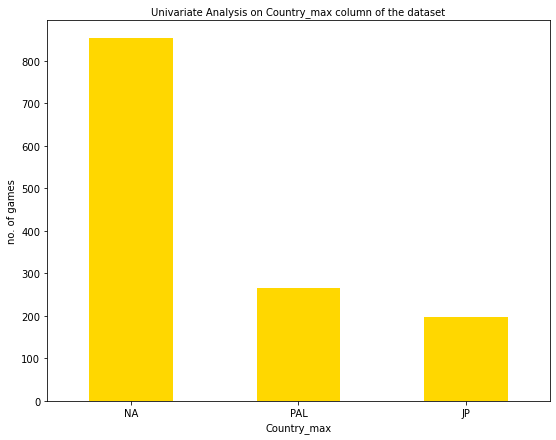

In [ ]:
#bar plot for categorical columns
plt.rcParams['figure.figsize']=(9,7)
x=data['Country_max'].value_counts()
x.plot(kind='bar', color ='gold')
plt.title('Univariate Analysis on Country_max column of the dataset', fontsize= 10)
plt.xlabel('Country_max')
plt.ylabel('no. of games')
plt.xticks(rotation = 360)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Critic_Score'>

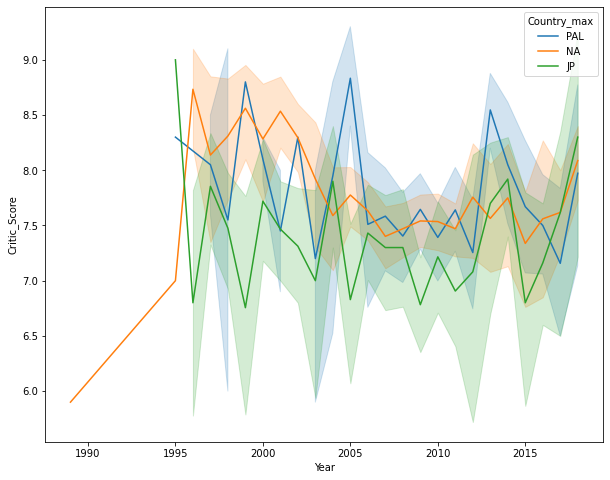

In [ ]:
plt.rcParams['figure.figsize']=(10,8)
sns.lineplot(data=data, x='Year', y='Critic_Score', hue='Country_max')

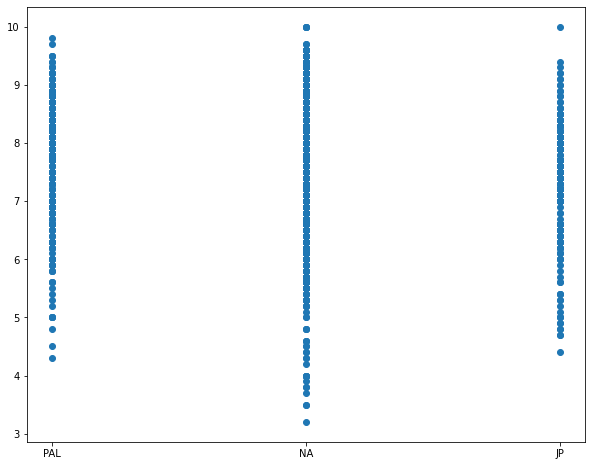

In [ ]:
#scatter plot
x=data['Country_max']
y=data['Critic_Score']
plt.scatter(x,y)

In [ ]:
data.dtypes

Genre            object
ESRB_Rating      object
Platform         object
Publisher        object
Developer        object
Critic_Score    float64
Year            float64
Country_max      object
dtype: object

In [ ]:
num_cols = list(data.select_dtypes('float64').columns)
data_num = data[num_cols]

In [ ]:
cols = list(data.select_dtypes('object').columns)
print(cols)

['Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Developer', 'Country_max']


In [ ]:
#converting categorical variables to number series
le = preprocessing.LabelEncoder()

data = data[cols].apply(le.fit_transform)
data.head()

,Genre,ESRB_Rating,Platform,Publisher,Developer,Country_max
0,0,2,13,59,306,2
1,0,2,14,59,306,2
2,0,2,12,59,306,1
3,14,2,21,7,177,1
4,14,2,21,7,382,1


In [ ]:
#merging data
data = pd.concat([data_num,data], axis=1)
data.head()

,Critic_Score,Year,Genre,ESRB_Rating,Platform,Publisher,Developer,Country_max
0,9.4,2013.0,0,2,13,59,306,2
1,9.7,2014.0,0,2,14,59,306,2
2,9.6,2002.0,0,2,12,59,306,1
3,8.7,2011.0,14,2,21,7,177,1
4,8.8,2010.0,14,2,21,7,382,1


##Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
#splitting dataset into training and testing models
X_train, X_test, y_train, y_test = train_test_split(data.drop('Country_max',axis=1),data['Country_max'],test_size = 0.3, random_state = 7)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2,
       1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0,
       1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1,

In [ ]:
print("ACCURACY SCORE :", metrics.accuracy_score(y_test,y_pred))
RMSE=np.sqrt(np.sum(np.square(y_pred-y_test)))
print("RMSE :", RMSE)

ACCURACY SCORE : 0.6085858585858586
RMSE : 13.038404810405298


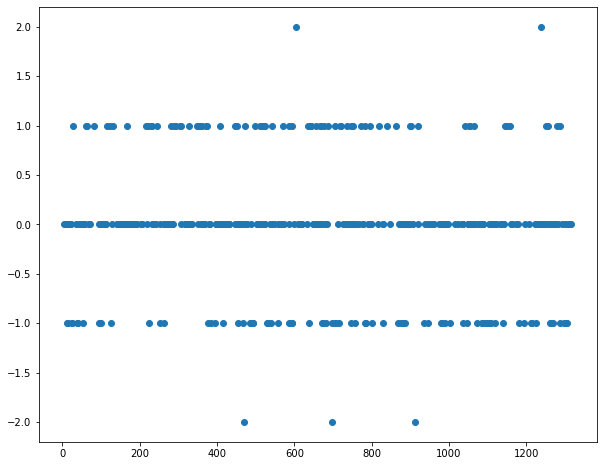

In [ ]:
#PLOTTING THE PREDICTION ERROR
g=plt.plot(y_test - y_pred,marker='o',linestyle='')

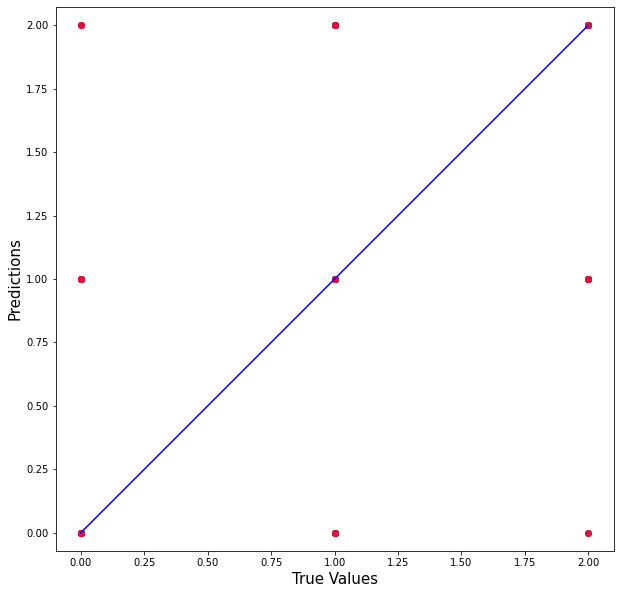

In [ ]:
#PLOTTING PREDICTION VS ACTUAL
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

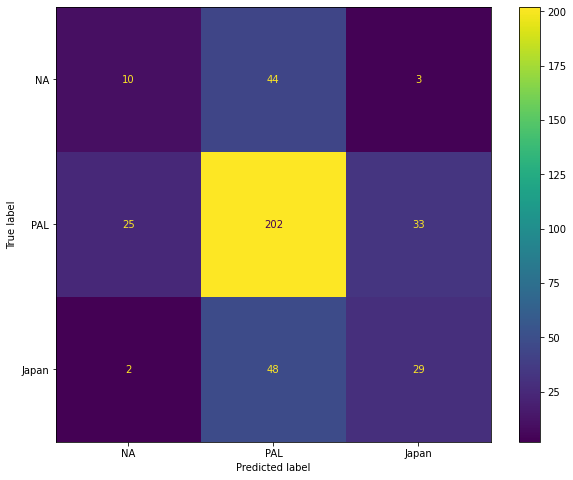

In [ ]:
#Confusion Matrx
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['NA', 'PAL', 'Japan'])
cm_display.plot()
plt.show()